In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
# import tensorflow_datasets as tfdf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import tensorflow as tf

In [3]:
img_width=48
img_height=48
batch_size_= 128
data_dir = r"./train/"
test_dir=r"./test"

In [11]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size= (img_height,img_width),
    batch_size=batch_size_
)
class_names = dataset.class_names
class_names

Found 27813 files belonging to 7 classes.


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

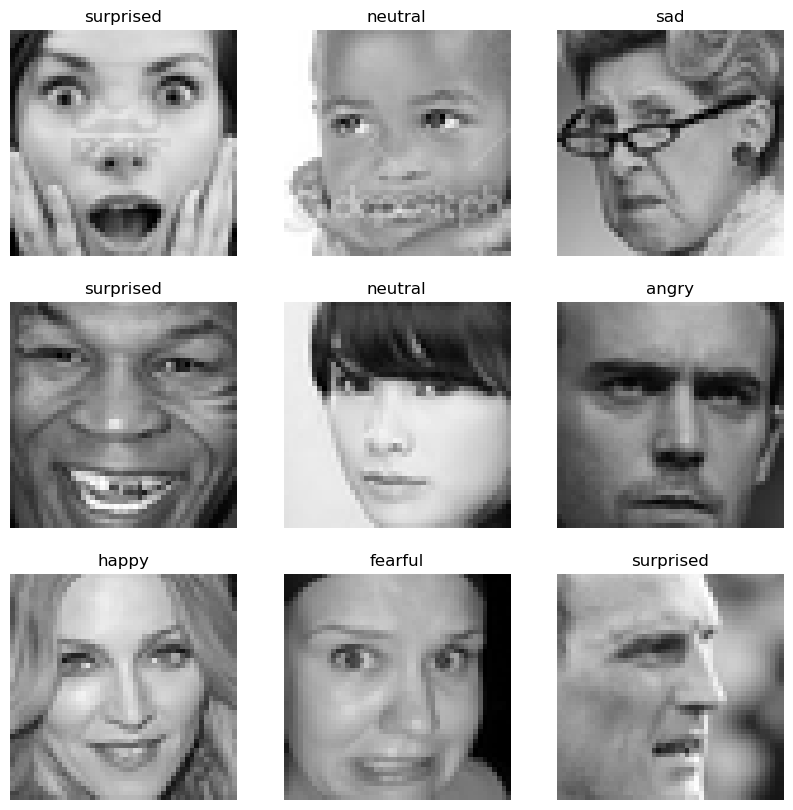

In [23]:
plt.figure(figsize=(10,10))
for images,labels in dataset.take(3):
    for i in range (9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels[i]])

In [65]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(input_shape=(48,48,3),include_top=False)
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255),
])
model= keras.Sequential([
    # resize_and_rescale,
    # layers.BatchNormalization(),
    # base_model,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(48,48,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(256,(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    # layers.BatchNormalization(),
    # layers.Dense(128,activation="relu"),
    layers.Dense(7,activation="softmax")
    
])
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-4),loss = tf.keras.losses.SparseCategoricalCrossentropy()
,metrics = ['accuracy'])
model.build(input_shape=(None,48,48,3))

In [67]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    image_size= (img_height,img_width),
    batch_size=batch_size_
)
history_model = model.fit(dataset,validation_data=test_data,epochs=7, verbose=1)

Found 7178 files belonging to 7 classes.
Epoch 1/7
580/580 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.5479 - loss: 1.2127 - val_accuracy: 0.4824 - val_loss: 1.4136
Epoch 2/7
580/580 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.5906 - loss: 1.1182 - val_accuracy: 0.4872 - val_loss: 1.3958
Epoch 3/7
580/580 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6298 - loss: 1.0181 - val_accuracy: 0.4886 - val_loss: 1.4248
Epoch 4/7
580/580 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.6722 - loss: 0.9150 - val_accuracy: 0.4967 - val_loss: 1.4338
Epoch 5/7
580/580 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.7098 - loss: 0.8224 - val_accuracy: 0.4964 - val_loss: 1.4785
Epoch 6/7
580/580 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.7464 - loss: 0.7212 - val_accuracy: 0.4947 - val_loss: 1.5670
Epoch 7/7
580/580 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.7819 - loss: 0.6344 - val_accuracy: 0.5035 - val_loss: 1.5984


In [70]:
model.save('seven_epochs.keras')

In [16]:
loaded_model = tf.keras.models.load_model('seven_epochs.h5')

In [5]:
loaded_model.evaluate(test_data)

NameError: name 'test_data' is not defined

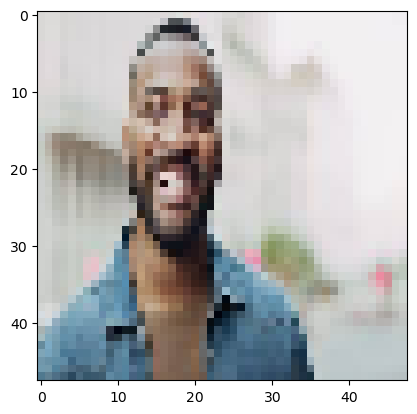

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.17540964 0.11453391 0.12153853 0.14651144 0.1442448  0.18699898
  0.11076266]]
sad
Confidence: 18.70%


In [17]:
import cv2
img_path = r"./smile.jpg"
img = cv2.imread(img_path)

# Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized_img = tf.image.resize(img, (48,48))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

yhat=loaded_model.predict(np.expand_dims(resized_img/255, 0))
print(yhat)

# print(np.argmax(yhat))

predicted_label = class_names[np.argmax(yhat)]
print(predicted_label)

print(f'Confidence: {np.max(yhat)*100:.2f}%')